In [1]:
import os
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from keras_unet.models import custom_unet
from keras_unet.utils import plot_segm_history
import numpy as np

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [2]:
input_data = np.load('input_data.npy', allow_pickle=True)
output_data = np.load('output_data.npy', allow_pickle=True)

In [3]:
input_data = input_data[:,:,:,0:3]/255.0
output_data = output_data/255.0

In [4]:
num_sample = input_data.shape[0]

id_selected = np.random.choice(np.arange(num_sample),size = int(20/100*num_sample),replace=False)
id_else = np.setdiff1d(np.arange(num_sample),id_selected)

input_val = input_data[id_selected,:,:,:]
input_train = input_data[id_else,:,:,:]

output_val = output_data[id_selected,:,:]
output_train = output_data[id_else,:,:]

print(np.shape(input_val))
print(np.shape(input_train))
print(np.shape(output_val))
print(np.shape(output_train))


(200, 256, 256, 3)
(800, 256, 256, 3)
(200, 256, 256, 1)
(800, 256, 256, 1)


In [5]:
img_size_x = 256
img_size_y = 256

num_channels_inp = 3

model = custom_unet(
    input_shape=(img_size_x, img_size_y, num_channels_inp),
    use_batch_norm=False,
    num_classes=1,
    filters=8,
    dropout=0.1,
    activation='tanh',
    output_activation='tanh')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 8)  224         ['input_1[0][0]']                
                                                                                                  
 spatial_dropout2d (SpatialDrop  (None, 256, 256, 8)  0          ['conv2d[0][0]']                 
 out2D)                                                                                           
                                                                                              

In [13]:
num_epoch = 100
batch_size = 32
learning_rate = 0.001

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss=['MSE'], metrics=['MSE'])


history = model.fit(input_train, output_train, batch_size=batch_size, epochs=num_epoch,
 validation_data=(input_val, output_val))


Epoch 1/100
25/25 [==============================] - 6s 177ms/step - loss: 0.1076 - MSE: 0.1076 - val_loss: 0.0939 - val_MSE: 0.0939
Epoch 2/100
25/25 [==============================] - 4s 166ms/step - loss: 0.0973 - MSE: 0.0973 - val_loss: 0.0864 - val_MSE: 0.0864
Epoch 3/100
25/25 [==============================] - 4s 166ms/step - loss: 0.0943 - MSE: 0.0943 - val_loss: 0.0852 - val_MSE: 0.0852
Epoch 4/100
25/25 [==============================] - 4s 166ms/step - loss: 0.0914 - MSE: 0.0914 - val_loss: 0.0841 - val_MSE: 0.0841
Epoch 5/100
25/25 [==============================] - 4s 168ms/step - loss: 0.0878 - MSE: 0.0878 - val_loss: 0.0832 - val_MSE: 0.0832
Epoch 6/100
25/25 [==============================] - 4s 168ms/step - loss: 0.0882 - MSE: 0.0882 - val_loss: 0.0828 - val_MSE: 0.0828
Epoch 7/100
25/25 [==============================] - 4s 168ms/step - loss: 0.0822 - MSE: 0.0822 - val_loss: 0.0720 - val_MSE: 0.0720
Epoch 8/100
25/25 [==============================] - 4s 168ms/step - 

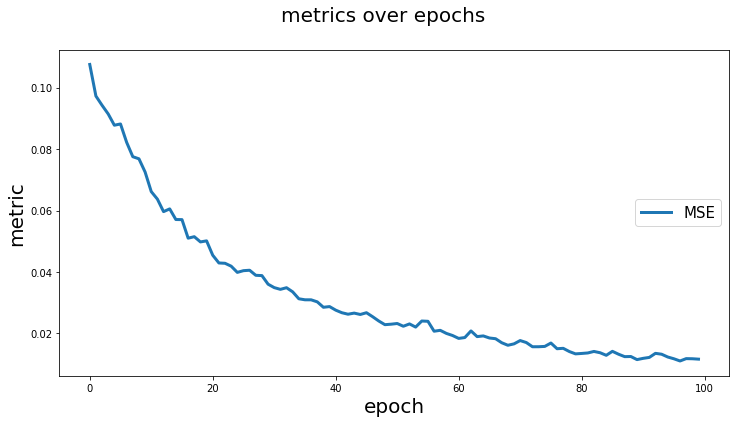

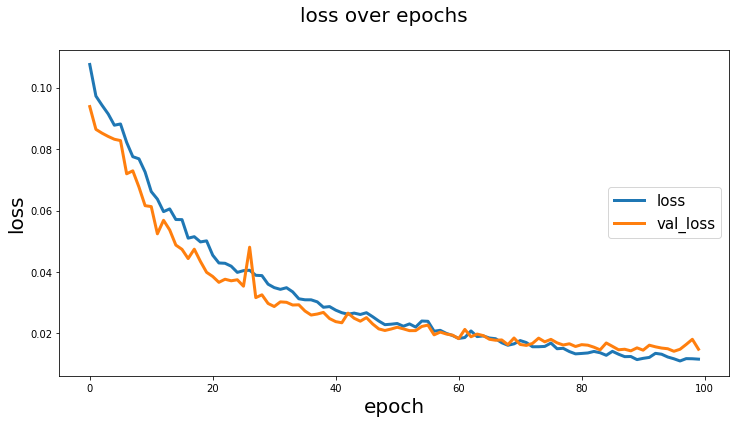

In [14]:

plot_segm_history(
    history, # required - keras training history object
    metrics=['MSE'], # optional - metrics names to plot
    losses=['loss', 'val_loss']) # optional - loss names to plot

In [15]:
predict = model.predict(input_val)

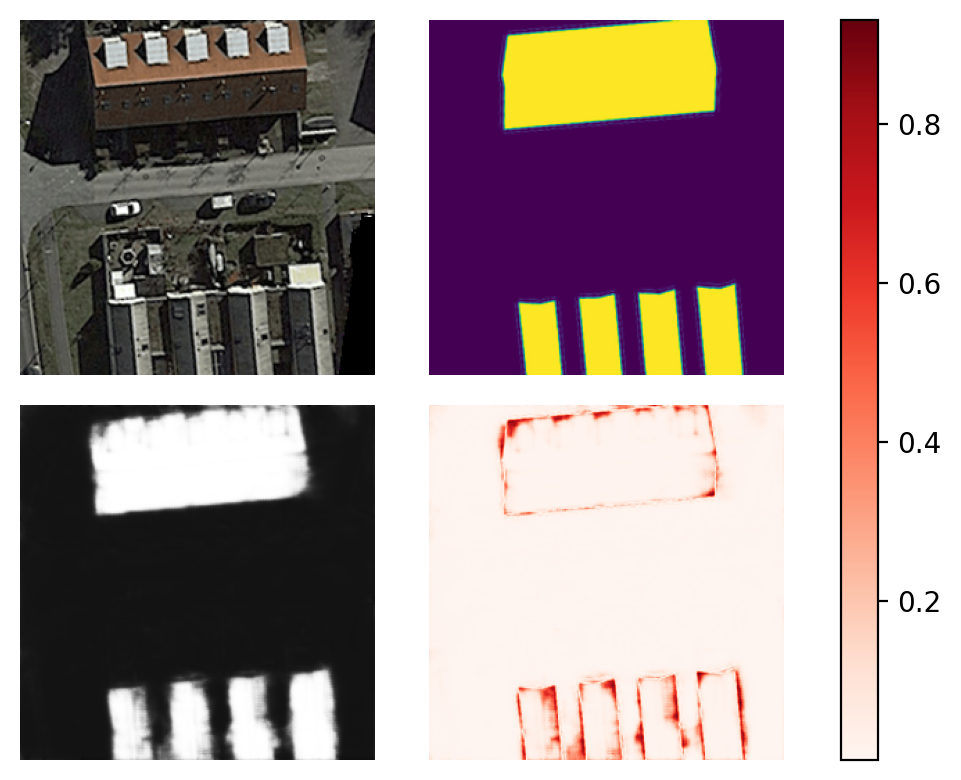

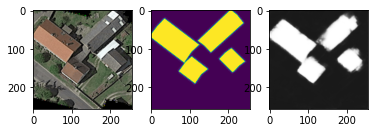

In [61]:
fig, ax = plt.subplots(2,2, dpi=200)
ax[0][0].imshow(input_val[0])
ax[0][0].set_axis_off()
ax[0][1].imshow(output_val[0])
ax[0][1].set_axis_off()
ax[1][0].imshow(predict[0], cmap='gray')
ax[1][0].set_axis_off()
img_temp = ax[1][1].imshow(abs(predict[0]-output_val[0]), cmap='Reds')
ax[1][1].set_axis_off()
plt.tight_layout()
# cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(img_temp, ax=ax)

fig, ax = plt.subplots(1,3)
ax[0].imshow(input_val[1])
ax[1].imshow(output_val[1])
ax[2].imshow(predict[1], cmap='gray')

In [18]:
model.evaluate(input_val, output_val)

7/7 [==============================] - 1s 39ms/step - loss: 0.0149 - MSE: 0.0149


[0.01486019603908062, 0.01486019603908062]

In [54]:
# Save the model
directory_model = 'saved_model'
model.save(directory_model, save_format='tf')

INFO:tensorflow:Assets written to: saved_model\assets


In [55]:
# chack the saved model

loaded_model = model = tf.keras.models.load_model(directory_model,custom_objects=None)

In [56]:
predict = loaded_model.predict(input_val)

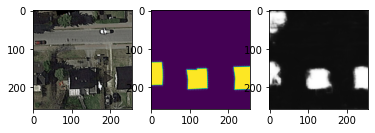

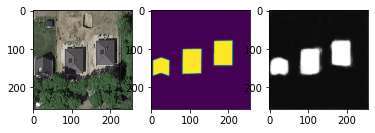

In [59]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(input_val[2])
ax[1].imshow(output_val[2])
ax[2].imshow(predict[2], cmap='gray')

id = 3
fig, ax = plt.subplots(1,3)
ax[0].imshow(input_val[id])
ax[1].imshow(output_val[id])
ax[2].imshow(predict[id], cmap='gray')